In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')


In [5]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [3]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [9]:
images = glob('train_cancer/*/*.jpg')
len(images)


270

In [7]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 986D-5B73

 Directory of C:\Users\Hp

26-06-2024  16:12    <DIR>          .
26-06-2024  16:12    <DIR>          ..
19-01-2024  15:06    <DIR>          .anaconda
14-05-2024  17:02    <DIR>          .arduinoIDE
12-01-2024  22:25    <DIR>          .cache
22-05-2024  13:23    <DIR>          .conda
19-01-2024  15:07                25 .condarc
19-01-2024  15:06    <DIR>          .continuum
13-02-2024  21:30                47 .cortex-debug
12-01-2024  22:25    <DIR>          .eclipse
19-03-2024  22:56               193 .gitconfig
26-06-2024  13:07    <DIR>          .idlerc
26-06-2024  15:47    <DIR>          .ipynb_checkpoints
19-01-2024  23:39    <DIR>          .ipython
26-06-2024  12:23    <DIR>          .jupyter
26-06-2024  16:05    <DIR>          .keras
19-01-2024  23:40    <DIR>          .matplotlib
23-06-2024  20:09    <DIR>          .p2
26-06-2024  15:26    <DIR>          .vscode
21-07-2023  19:47    <DIR>          3D Objects
16

In [10]:
images = [path.replace('\\', '/') for path in images]
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[1]
df.head()

,filepath,label
0,train_cancer/benign/12.jpg,benign
1,train_cancer/benign/13.jpg,benign
2,train_cancer/benign/14.jpg,benign
3,train_cancer/benign/17.jpg,benign
4,train_cancer/benign/19.jpg,benign


In [11]:
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
df.head()

,filepath,label,label_bin
0,train_cancer/benign/12.jpg,benign,0
1,train_cancer/benign/13.jpg,benign,0
2,train_cancer/benign/14.jpg,benign,0
3,train_cancer/benign/17.jpg,benign,0
4,train_cancer/benign/19.jpg,benign,0


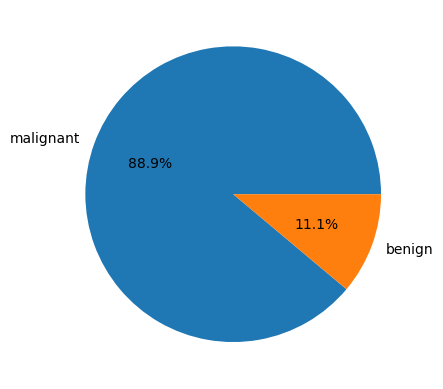

In [12]:
x = df['label'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

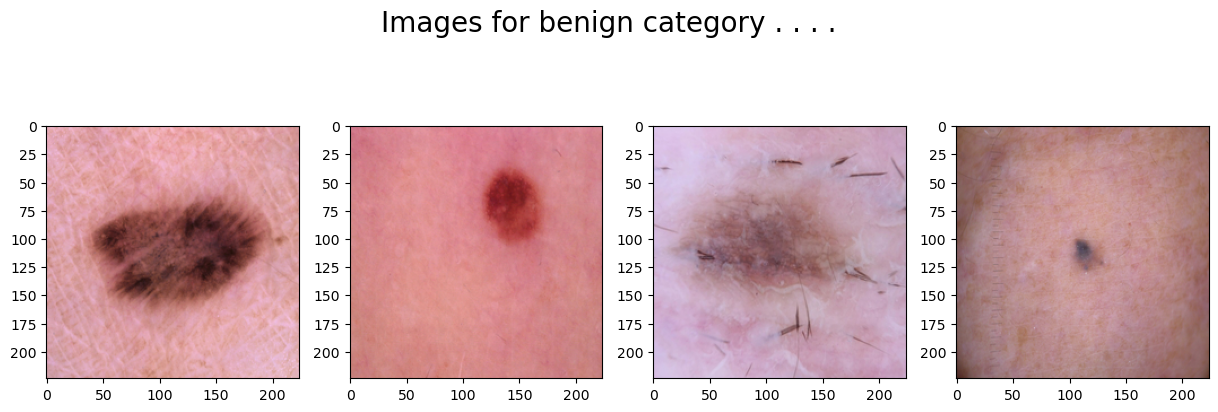

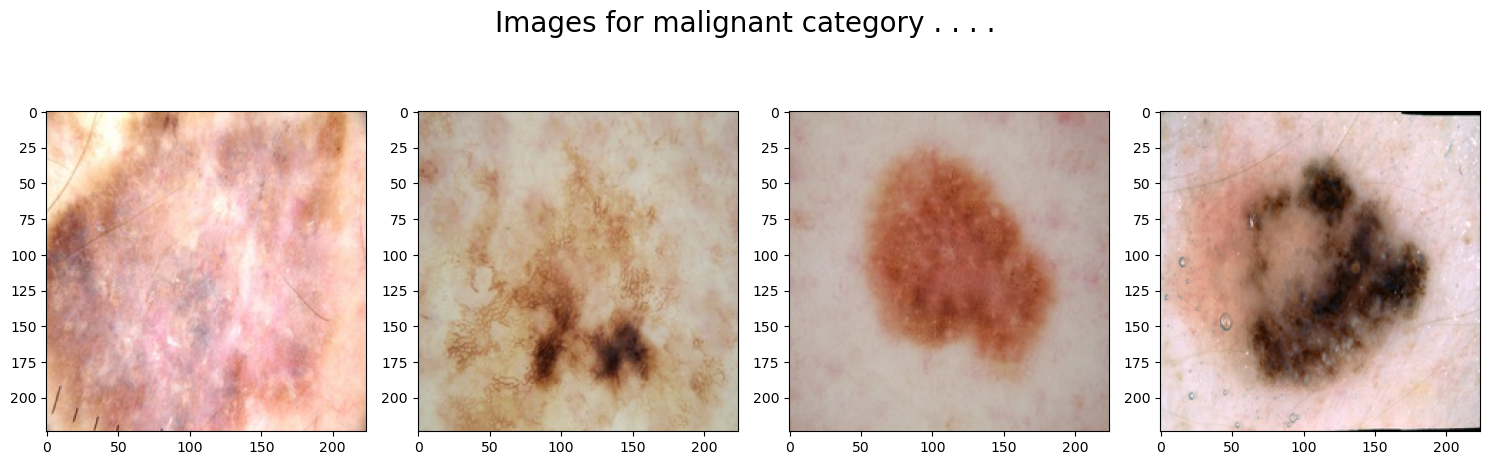

In [13]:
for cat in df['label'].unique():
	temp = df[df['label'] == cat]

	index_list = temp.index
	fig, ax = plt.subplots(1, 4, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
	for i in range(4):
		index = np.random.randint(0, len(index_list))
		index = index_list[index]
		data = df.iloc[index]

		image_path = data[0]

		img = np.array(Image.open(image_path))
		ax[i].imshow(img)
plt.tight_layout()
plt.show()


In [14]:
features = df['filepath']
target = df['label_bin']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.15,
									random_state=10)

X_train.shape, X_val.shape


((229,), (41,))

2.16.1
 Volume in drive C has no label.
 Volume Serial Number is 986D-5B73

 Directory of C:\Users\Hp

26-06-2024  20:29    <DIR>          .
26-06-2024  20:29    <DIR>          ..
19-01-2024  15:06    <DIR>          .anaconda
14-05-2024  17:02    <DIR>          .arduinoIDE
12-01-2024  22:25    <DIR>          .cache
22-05-2024  13:23    <DIR>          .conda
19-01-2024  15:07                25 .condarc
19-01-2024  15:06    <DIR>          .continuum
13-02-2024  21:30                47 .cortex-debug
12-01-2024  22:25    <DIR>          .eclipse
19-03-2024  22:56               193 .gitconfig
26-06-2024  13:07    <DIR>          .idlerc
26-06-2024  15:47    <DIR>          .ipynb_checkpoints
19-01-2024  23:39    <DIR>          .ipython
26-06-2024  12:23    <DIR>          .jupyter
26-06-2024  16:05    <DIR>          .keras
19-01-2024  23:40    <DIR>          .matplotlib
23-06-2024  20:09    <DIR>          .p2
26-06-2024  15:26    <DIR>          .vscode
21-07-2023  19:47    <DIR>          3D Obj

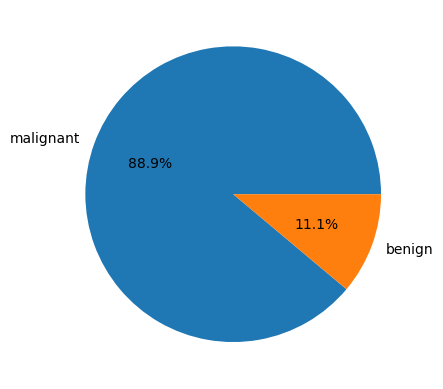

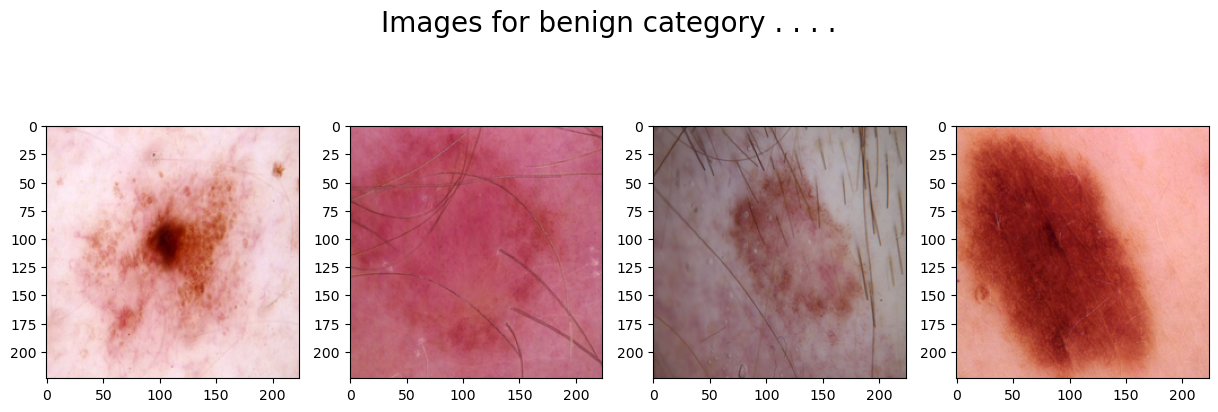

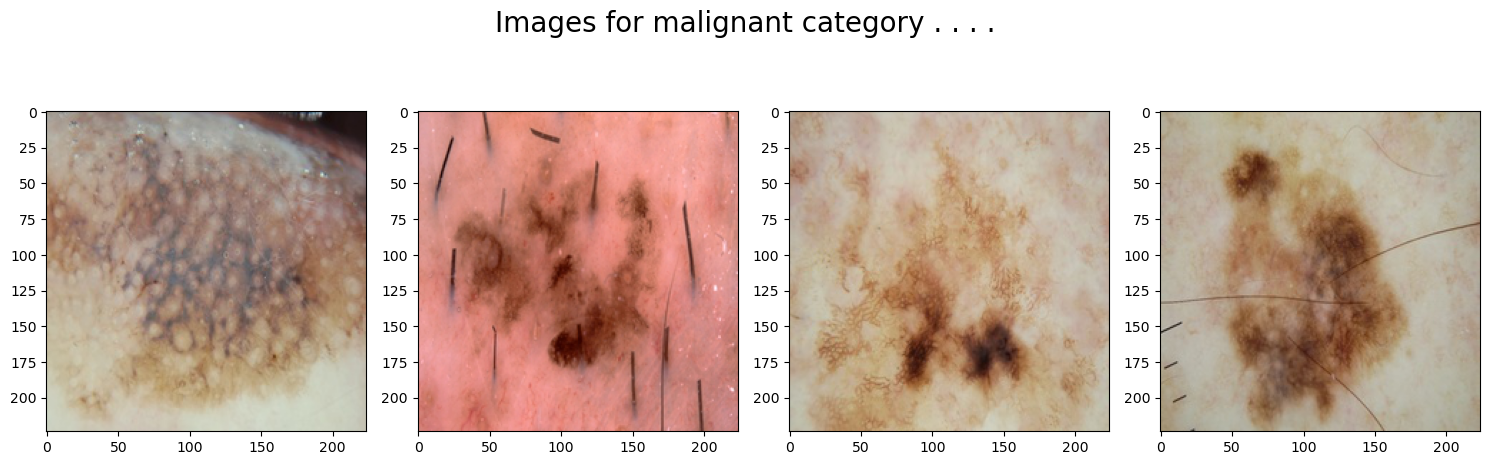

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')


# Checking TensorFlow version
print(tf.__version__)

# Ensure TensorFlow is installed
!pip install tensorflow

# Load images
images = glob('train_cancer/*/*.jpg')
len(images)

# Directory listing
!dir

# Convert file paths
images = [path.replace('\\', '/') for path in images]
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[1]
df.head()

# Binary labels
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
df.head()

# Plot pie chart of label distribution
x = df['label'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

# Display sample images
for cat in df['label'].unique():
    temp = df[df['label'] == cat]
    index_list = temp.index
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        data = df.iloc[index]
        image_path = data[0]
        img = np.array(Image.open(image_path))
        ax[i].imshow(img)
plt.tight_layout()
plt.show()

# Train-test split
features = df['filepath']
target = df['label_bin']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.15, random_state=10)
X_train.shape, X_val.shape

# Function to decode image and prepare for training
def decode_image(filepath, label):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

# Prepare training dataset
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

# Prepare validation dataset
val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

# Check the datasets
print(train_ds)
print(val_ds)


In [18]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
 
pre_trained_model = EfficientNetB7(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)
 
for layer in pre_trained_model.layers:
    layer.trainable = False

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [19]:
from tensorflow.keras import Model
 
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Flatten()(inputs)
 
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
 
model = Model(inputs, outputs)

In [20]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC']
)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming input images are of size (224, 224, 3)
input_shape = (224, 224, 3)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust output units as needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Assume train_ds and val_ds are your training and validation datasets
# You can replace these with actual data loading code as needed

# Print shapes of a batch of training data for debugging
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

(32, 224, 224, 3)
(32,)
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6216 - loss: 2.5776 - val_accuracy: 0.9024 - val_loss: 0.3015
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8913 - loss: 0.3107 - val_accuracy: 0.9024 - val_loss: 0.2153
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9064 - loss: 0.2455 - val_accuracy: 0.9024 - val_loss: 0.3229
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9221 - loss: 0.2637 - val_accuracy: 0.9024 - val_loss: 0.2693
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9206 - loss: 0.2160 - val_accuracy: 0.9512 - val_loss: 0.1529


In [25]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.650655,3.671105,0.902439,0.439025
1,0.886463,0.485983,0.902439,0.252239
2,0.890830,0.356524,0.975610,0.236418
3,0.925764,0.242095,0.902439,0.170436
4,0.947598,0.156453,0.951219,0.162174


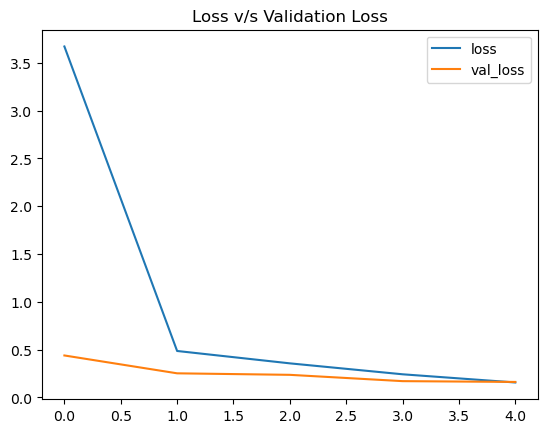

In [26]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

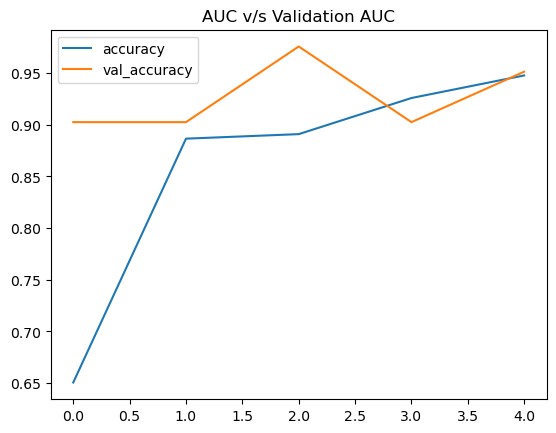

In [36]:
hist_df['accuracy'].plot()
hist_df['val_accuracy'].plot()
plt.title('AUC v/s Validation AUC')
plt.legend()
plt.show()